In [ ]:
%load_ext autoreload
%autoreload 2

from fibsem import utils, acquire, milling, conversions, structures

from fibsem.structures import BeamType, Point, FibsemRectangle


In [ ]:
microscope, settings = utils.setup_session(config_path=r"C:\Users\Admin\Github\autolamella\autolamella")

In [ ]:

settings.image.beam_type = BeamType.ION
ref_image = acquire.new_image(microscope, settings.image)


In [ ]:




pixelsize = ref_image.metadata.pixel_size.x
fiducial_centre = Point(-50e-6, -10e-6)
fiducial_length = 30e-6 # microscope_settings.protocol["fiducial"]["length"] 
fiducial_area = calculate_fiducial_area(settings, fiducial_centre, fiducial_length, pixelsize)

print(fiducial_area)

settings.image.reduced_area = fiducial_area
image = acquire.new_image(microscope, settings.image)
print(image.metadata.image_settings.reduced_area)


## Minimap
Position Display

In [1]:
%load_ext autoreload
%autoreload 2

from fibsem import utils, acquire, milling, conversions, structures
from fibsem.structures import FibsemImage, BeamType
import os
from fibsem.imaging import _tile

import matplotlib.pyplot as plt
from autolamella.structures import Experiment

# microscope, settings = utils.setup_session()


c:\Users\Admin\.conda\envs\liftout\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\.conda\envs\liftout\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Admin\.conda\envs\liftout\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


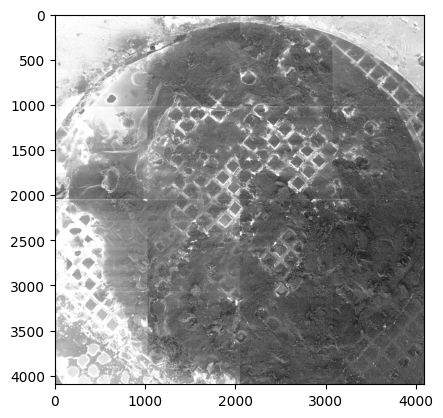

In [2]:

PATH = r"C:\Users\Admin\Github\autolamella\autolamella\log\HANNAH-WAFFLE-26072023"
# EXP_PATH = r"C:\Users\Admin\Github\autolamella\autolamella\log\HANNAH-WAFFLE-26072023\experiment.yaml"
exp = Experiment.load(os.path.join(PATH, "experiment.yaml"))
image = FibsemImage.load(os.path.join(PATH, "overview-image-ion-auto-gamma.tif"))
eb_image = FibsemImage.load(os.path.join(PATH, "overview-electron.tif"))
ion_image = FibsemImage.load(os.path.join(PATH, "overview-ion-trench.tif"))

plt.imshow(image.data, cmap="gray")
plt.show()

In [93]:
from autolamella.tools.data import create_history_dataframe, calculate_statistics_dataframe
import plotly.express as px
import pandas as pd


pd.set_option('display.max_rows', 200)

df_experiment, df_history, beam_shift_info, df_steps, df_stage = calculate_statistics_dataframe(PATH)




--------------------------------------------------------------------------------


In [95]:
# display(df_stage)

df_stage_filter = df_stage[df_stage["stage"] != "Setup"]
# drop relative moves 
df_stage_filter = df_stage_filter[df_stage_filter["type"] != "relative"]

# drop x=0, y=0
df_stage_filter = df_stage_filter[df_stage_filter["x"] != 0]
df_stage_filter = df_stage_filter[df_stage_filter["y"] != 0]


px.line(df_stage_filter, x="x", y="y", color="stage",symbol="lamella",  title="Stage History")


In [46]:
# display(df_steps)

fig = px.bar(df_steps, x="lamella", y="duration", color="step", title="Step Duration", barmode="stack", facet_col="stage")

fig.show()
# plot time series with x= step_n and y = timestamp with step  as hover text
df_steps.dropna(inplace=True)
df_steps.duration =df_steps.duration.astype(int)

# convert timestamp to datetime, aus timezone 
df_steps.timestamp = pd.to_datetime(df_steps.timestamp, unit="s")

# convert timestamp to australian timezone
df_steps.timestamp = df_steps.timestamp.dt.tz_localize("UTC").dt.tz_convert("Australia/Sydney")

fig = px.scatter(df_steps, x="step_n", y="timestamp", color="stage", symbol="lamella",
    title="AutoLamella Timeline", 
    hover_name="stage", hover_data=["lamella", "step_n", "step"],)
    # size = "duration", size_max=20)

fig.show()

TypeError: Already tz-aware, use tz_convert to convert.

In [23]:

fig = px.bar(df_steps, x="step", y="duration", color="step", barmode="group", facet_col="stage")
fig.show()

In [25]:
fig = px.bar(df_steps, x="step", y="duration", color="step", title="Step Duration", facet_col="stage", facet_row="lamella")

fig.show()
# plot time series with x= step_n and y = timestamp with step  as hover text
df_steps.dropna(inplace=True)
df_steps.duration =df_steps.duration.astype(int)

# convert timestamp to datetime, aus timezone 
df_steps.timestamp = pd.to_datetime(df_steps.timestamp, unit="s")

# convert timestamp to australian timezone
df_steps.timestamp = df_steps.timestamp.dt.tz_localize("UTC").dt.tz_convert("Australia/Sydney")

fig = px.scatter(df_steps, x="step_n", y="timestamp", color="stage", symbol="lamella",
    title="AutoLamella Timeline", 
    hover_name="stage", hover_data=["lamella", "step_n", "step"],)
    # size = "duration", size_max=20)

fig.show()

TypeError: Already tz-aware, use tz_convert to convert.

In [12]:
# display(df_experiment)


lamella      stage  \
0    Movement Widget     36e-04   
1    Movement Widget     17e-04   
2     Milling Widget  Trench 01   
3     Milling Widget  Trench 01   
4     Milling Widget  Trench 01   
..               ...        ...   
303     04-happy-pig   Finished   
304      05-glad-pup   Finished   
305  Movement Widget     58e-05   
306  Movement Widget     92e-05   
307  Movement Widget     51e-05   

                                                  step     timestamp  step_n  
0                                    BeamType.ELECTRON  1.690333e+09       0  
1                                         BeamType.ION  1.690333e+09       1  
2    MOVED_PATTERN_TO_Point(x=-7.313249316793077e-0...  1.690334e+09       2  
3    MOVED_PATTERN_TO_Point(x=-1.786654870705373e-0...  1.690334e+09       3  
4    MOVED_PATTERN_TO_Point(x=-1.3052986703893764e-...  1.690334e+09       4  
..                                                 ...           ...     ...  
303                                           FINISHED  1.690358e+09     303  
304                                           FINISHED  1.690358e+09     304  
305                                  BeamType.ELECTRON  1.690359e+09     305  
306                                  BeamType.ELECTRON  1.690359e+09     306  
307                                  BeamType.ELECTRON  1.690359e+09     307  

[308 rows x 5 columns]

In [3]:

df = create_history_dataframe(exp)
display(df)

import plotly.express as px

fig = px.bar(df, x="petname", y="duration", color="stage", barmode="group", hover_data=df.columns)
fig.show()

petname             stage         start           end  \
0       01-mint-stag        MillTrench  1.690334e+09  1.690336e+09   
1       01-mint-stag      MillUndercut  1.690341e+09  1.690342e+09   
2       01-mint-stag      SetupLamella  1.690349e+09  1.690349e+09   
3       01-mint-stag      MillFeatures  1.690350e+09  1.690350e+09   
4       01-mint-stag      MillRoughCut  1.690350e+09  1.690351e+09   
5       01-mint-stag    MillRegularCut  1.690351e+09  1.690351e+09   
6       01-mint-stag  MillPolishingCut  1.690351e+09  1.690352e+09   
7       01-mint-stag          Finished  1.690351e+09  1.690352e+09   
8       02-able-mink        MillTrench  1.690337e+09  1.690338e+09   
9       02-able-mink      MillUndercut  1.690342e+09  1.690343e+09   
10      02-able-mink      SetupLamella  1.690353e+09  1.690353e+09   
11      02-able-mink      MillFeatures  1.690353e+09  1.690353e+09   
12      02-able-mink      MillRoughCut  1.690353e+09  1.690354e+09   
13      02-able-mink    MillRegularCut  1.690354e+09  1.690354e+09   
14      02-able-mink  MillPolishingCut  1.690354e+09  1.690355e+09   
15      02-able-mink          Finished  1.690354e+09  1.690355e+09   
16     03-hip-toucan        MillTrench  1.690338e+09  1.690338e+09   
17     03-hip-toucan      MillUndercut  1.690343e+09  1.690345e+09   
18     03-hip-toucan      SetupLamella  1.690353e+09  1.690353e+09   
19     03-hip-toucan      MillFeatures  1.690353e+09  1.690353e+09   
20     03-hip-toucan      MillRoughCut  1.690354e+09  1.690354e+09   
21     03-hip-toucan    MillRegularCut  1.690354e+09  1.690354e+09   
22     03-hip-toucan  MillPolishingCut  1.690355e+09  1.690355e+09   
23     03-hip-toucan          Finished  1.690355e+09  1.690355e+09   
24      04-happy-pig        MillTrench  1.690338e+09  1.690339e+09   
25      04-happy-pig      MillUndercut  1.690345e+09  1.690346e+09   
26      04-happy-pig      SetupLamella  1.690355e+09  1.690356e+09   
27      04-happy-pig      MillFeatures  1.690356e+09  1.690356e+09   
28      04-happy-pig      MillRoughCut  1.690356e+09  1.690357e+09   
29      04-happy-pig    MillRegularCut  1.690357e+09  1.690358e+09   
30      04-happy-pig  MillPolishingCut  1.690358e+09  1.690358e+09   
31      04-happy-pig          Finished  1.690358e+09  1.690358e+09   
32       05-glad-pup        MillTrench  1.690339e+09  1.690339e+09   
33       05-glad-pup      MillUndercut  1.690346e+09  1.690346e+09   
34       05-glad-pup      SetupLamella  1.690356e+09  1.690356e+09   
35       05-glad-pup      MillFeatures  1.690356e+09  1.690356e+09   
36       05-glad-pup      MillRoughCut  1.690357e+09  1.690357e+09   
37       05-glad-pup    MillRegularCut  1.690358e+09  1.690358e+09   
38       05-glad-pup  MillPolishingCut  1.690358e+09  1.690358e+09   
39       05-glad-pup          Finished  1.690358e+09  1.690358e+09   
40     06-direct-ram        MillTrench  1.690339e+09  1.690339e+09   
41     06-direct-ram      MillUndercut  1.690346e+09  1.690347e+09   
42     07-mint-corgi        MillTrench  1.690339e+09  1.690340e+09   
43     07-mint-corgi      MillUndercut  1.690347e+09  1.690348e+09   
44  08-sacred-donkey        MillTrench  1.690340e+09  1.690340e+09   
45  08-sacred-donkey      MillUndercut  1.690348e+09  1.690348e+09   
46    09-clear-bison        MillTrench  1.690340e+09  1.690340e+09   
47    09-clear-bison      MillUndercut  1.690348e+09  1.690348e+09   
48   10-vocal-vervet        MillTrench  1.690340e+09  1.690341e+09   
49   10-vocal-vervet      MillUndercut  1.690348e+09  1.690349e+09   

       duration  
0   1557.306782  
1    963.307141  
2    236.564973  
3    146.087377  
4    816.909934  
5    799.445787  
6    481.703629  
7    481.833282  
8    303.764226  
9   1000.441239  
10   209.988171  
11   122.776611  
12   300.922765  
13   256.220747  
14   263.221021  
15   534.757881  
16   314.853871  
17  1170.002784  
18   113.232187  
19    82.554475  
20   300.902454  
21   254.961226  
22   264.079064  
23   264.4

In [4]:

positions = {
    "MillTrench": [],
    "MillUndercut": []
}
for lamella in exp.positions:
    for state in lamella.history:
        
        if state.stage.name in positions.keys():
            positions[state.stage.name].append(state.microscope_state.absolute_position)
            positions[state.stage.name][-1].name = f"{lamella._petname}"# [{state.stage.name}]"

# pprint(positions)

NameError: name 'pprint' is not defined

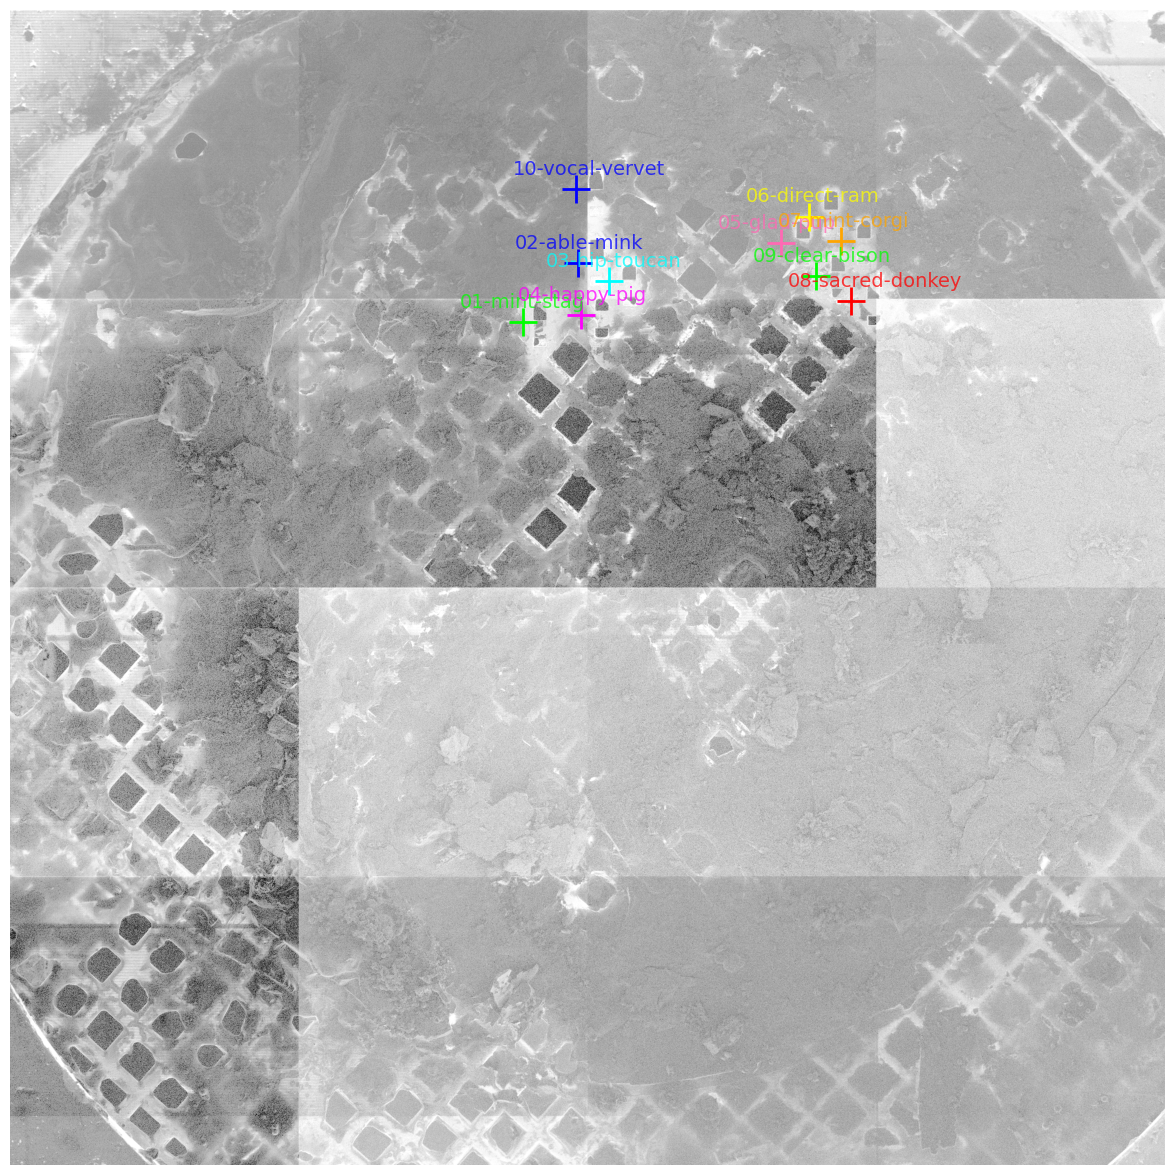

In [5]:

key = "MillTrench"
fig = _tile._plot_positions(ion_image, positions[key], show=True)
fig.savefig(os.path.join(PATH, f"overview-positions-{key.lower()}.png"), dpi=300, bbox_inches='tight')

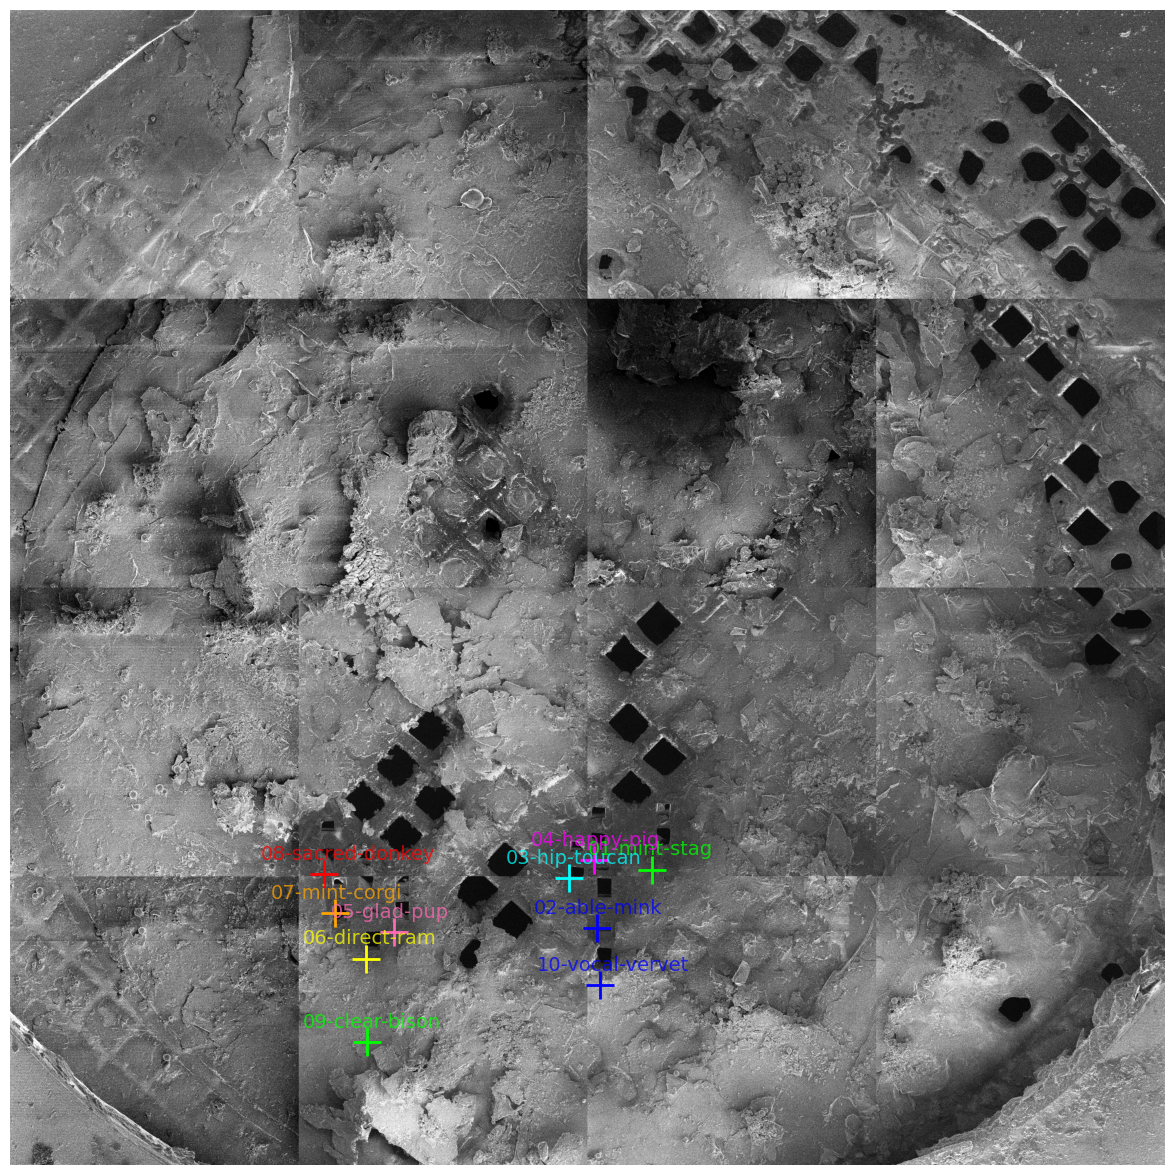

In [6]:
fig = _tile._plot_positions(eb_image, positions["MillUndercut"], show=True)
fig.savefig(os.path.join(PATH, "overview-positions-mill-undercut.png"), dpi=300, bbox_inches='tight')


In [ ]:
i  =0 
_n = f"{i+1:02d}"

In [ ]:
_n